/opt/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


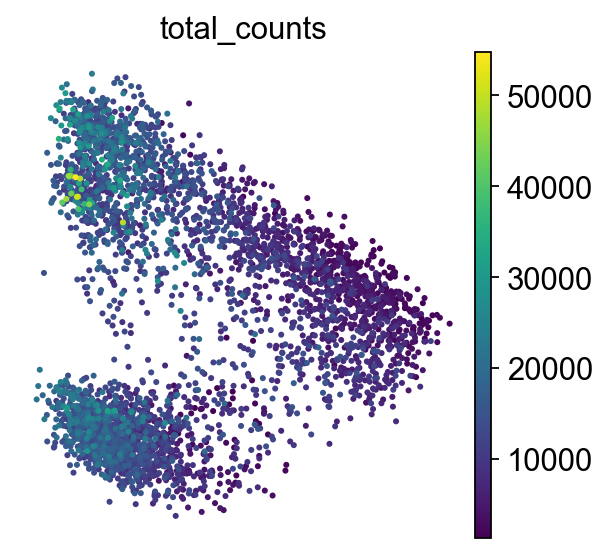

In [15]:
import scanpy as sc

# 1. Load the feature-selected dataset and set normalized data
adata = sc.read("s4d8_feature_selection.h5ad")
adata.X = adata.layers["log1p_norm"]

# 2. Mark highly variable genes based on your feature selection
adata.var["highly_variable"] = adata.var["highly_deviant"]

# 3. Perform PCA using only the highly variable genes
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)
sc.pl.pca_scatter(adata, color="total_counts")

# # 4. Compute t-SNE using the PCA representation
# sc.tl.tsne(adata, use_rep="X_pca")
# sc.pl.tsne(adata, color="total_counts")

# # 5. Compute UMAP based on the neighborhood graph from PCA
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)
# sc.pl.umap(adata, color="total_counts")

# 6. Save the updated AnnData object with dimensionality reduction results
adata.write("s4d8_dimensionality_reduction.h5ad")